# **1. Preprocessing**

## Code

In [1]:
from google.colab import drive
import os
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import chardet

# Setup
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
russian_stopwords = set(stopwords.words('russian'))

BOOK_COLLECTIONS_DIR = '/content/drive/MyDrive/Studies/Semester 8/Capstone Project - Phase 2/Data/Books'
PROCESSED_SAVE_DIR = '/content/drive/MyDrive/Studies/Semester 8/Capstone Project - Phase 2/Data/Processed'

drive.mount('/content/drive')

# Preprocess a string
def preprocess_string(text):
    if not isinstance(text, str):
      raise ValueError("Input must be a Russian language string!")
    text = text.strip().lower()
    text = re.sub(r'[^Ѐ-ӿ0-9 ]', '', text)
    tokens = word_tokenize(text, language='russian')
    tokens = [t for t in tokens if t not in russian_stopwords]
    return " ".join(tokens)

# Reads a file with the best encoding from path
def read_with_best_encoding(path):
  with open(path, "rb") as f:
    raw = f.read()
  detect = chardet.detect(raw)
  enc = detect["encoding"] or "utf-8"
  print(f"detected encoding: {enc}")
  try:
    return raw.decode(enc)
  # fallback, in case chardet fails to detect.
  except:
    try:
      return raw.decode("utf-8", errors="replace")
    except:
      return raw.decode("windows-1251", errors="replace")

# Preprocess a given book collection with given author dir and save dir
def preprocess_book_collection(author_dir, author_save_dir):
    unprocessed_dir = author_dir
    processed_dir = author_save_dir

    # Create processed dir if missing
    os.makedirs(processed_dir, exist_ok=True)

    for filename in os.listdir(unprocessed_dir):
        unprocessed_path = os.path.join(unprocessed_dir, filename)
        processed_path = os.path.join(processed_dir, filename)

        # Skip if already processed
        if os.path.exists(processed_path):
            print(f"Skipping {filename}, already processed.")
            continue

        content = read_with_best_encoding(unprocessed_path)
        if not content:
            print(f"Skipping {filename} due to empty content or read error.")
            continue

        processed_content = preprocess_string(content)

        with open(processed_path, "w", encoding="utf-8") as f:
            f.write(processed_content)

        print(f"{filename} processed and saved to {processed_dir}")

# Preprocess all books from the book collections dir constant
def preprocess_all_books():
    for author in os.listdir(BOOK_COLLECTIONS_DIR):
        author_dir = os.path.join(BOOK_COLLECTIONS_DIR, author)
        author_save_dir = os.path.join(PROCESSED_SAVE_DIR, author)
        if os.path.isdir(author_dir):
            print(f"\nProcessing collection: {author}")
            preprocess_book_collection(author_dir, author_save_dir)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Mounted at /content/drive


In [2]:
def main():
    preprocess_all_books()
    print(f"\nPreprocessing Finished.")

main()


Processing collection: AJTMATOW
Skipping oblako.txt, already processed.
Skipping mpole.txt, already processed.
Skipping aitm_face.txt, already processed.
Skipping r_plach.txt, already processed.
Skipping chingiz.txt, already processed.

Processing collection: ALEKSIN
Skipping rebenok.txt, already processed.
Skipping kolya.txt, already processed.
Skipping razdel.txt, already processed.
Skipping iwashow.txt, already processed.
Skipping tretij.txt, already processed.
Skipping klarnet.txt, already processed.
Skipping strana_kanikul.txt, already processed.
Skipping family.txt, already processed.
Skipping aktrisa.txt, already processed.
Skipping cheharda.txt, already processed.

Processing collection: ALESHKOWSKIJ
Skipping nikalaj.txt, already processed.
Skipping kenguru.txt, already processed.
Skipping maskirowka.txt, already processed.
detected encoding: utf-8
stihi.txt processed and saved to /content/drive/MyDrive/Studies/Semester 8/Capstone Project - Phase 2/Data/Processed/ALESHKOWSKIJ


## Tests

In [3]:
# Preprocess string
import os
import tempfile

def test_preprocess_string_default():
  print("==== TC1: test preprocess string default ====")
  unprocessed_text = """В тот вечер он долго сидел у окна и смотрел на улицу.\n
                      Редкие прохожие спешили по своим делам, а фонари освещали мокрый асфальт.\n
                      Ему казалось, что время замедлилось, и каждая минута тянулась бесконечно."""

  expected_text = (
      "вечер долго сидел окна смотрел улицу "
      "редкие прохожие спешили своим делам фонари освещали мокрый асфальт "
      "казалось время замедлилось каждая минута тянулась бесконечно"
  )

  processed_text = preprocess_string(unprocessed_text)
  print(f"Input: {unprocessed_text}")
  print(f"Expected: {expected_text}")
  print(f"Result: {processed_text}")
  assert processed_text == expected_text
  print("Status: Passed!")
  print("=============================================\n")

def test_preprocess_string_invalid_input():
  print("==== TC2: test preprocess string invalid input ====")
  inputs = [1, [], {}]
  for input in inputs:
    try:
      print(f"Input: {input}")
      print(f"Expected: ValueError")
      processed_text = preprocess_string(input)
    except Exception as e:
      assert isinstance(e, ValueError)
      print(f"Result: ValueError\n")
  print("Status: Passed!")
  print("=============================================\n")

def read_with_best_encoding_default():
  print("==== TC3: test read with best encoding default ====")
  content = "В тот вечер он долго сидел у окна."
  encoded = content.encode("utf-8")
  print(f"Expected: {content}")
  # create tmp file and path
  fd, path = tempfile.mkstemp()
  # read it
  try:
    with os.fdopen(fd, "wb") as f:
      f.write(encoded)

    result = read_with_best_encoding(path)
    print(f"Result: {result}")
    # verify it extracted the right decoded string
    assert result == content
  # Cleanup
  finally:
    os.remove(path)
  print("Status: Passed!")
  print("=============================================\n")

def read_with_best_encoding_invalid_file_path():
  print("==== TC4: test read with best encoding default ====")
  print("Expected: FileNotFoundError")
  path = ""
  try:
    result = read_with_best_encoding(path)
    print("No exception caught...")
  except Exception as e:
    assert isinstance(e, FileNotFoundError)
    print("Output: FileNotFoundError")
  print("Status: Passed!")
  print("=============================================\n")

test_preprocess_string_default()
test_preprocess_string_invalid_input()
read_with_best_encoding_default()
read_with_best_encoding_invalid_file_path()

==== TC1: test preprocess string default ====
Input: В тот вечер он долго сидел у окна и смотрел на улицу.

                      Редкие прохожие спешили по своим делам, а фонари освещали мокрый асфальт.

                      Ему казалось, что время замедлилось, и каждая минута тянулась бесконечно.
Expected: вечер долго сидел окна смотрел улицу редкие прохожие спешили своим делам фонари освещали мокрый асфальт казалось время замедлилось каждая минута тянулась бесконечно
Result: вечер долго сидел окна смотрел улицу редкие прохожие спешили своим делам фонари освещали мокрый асфальт казалось время замедлилось каждая минута тянулась бесконечно
Status: Passed!

==== TC2: test preprocess string invalid input ====
Input: 1
Expected: ValueError
Result: ValueError

Input: []
Expected: ValueError
Result: ValueError

Input: {}
Expected: ValueError
Result: ValueError

Status: Passed!

==== TC3: test read with best encoding default ====
Expected: В тот вечер он долго сидел у окна.
detected encodin

# **2. Prediction Flow**

#### Installs, Imports and Globals

In [ ]:
!pip install -q torch transformers scikit-learn
!pip install -q fastdtw dtaidistance
!pip install -q tqdm
!pip install -q matplotlib seaborn

import os
import sys
import gc
import json
import time
import random
import itertools
import re
import hashlib
from datetime import datetime
from collections import defaultdict
from abc import ABC, abstractmethod
import numpy as np

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from transformers import AutoTokenizer, AutoModel

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive


EXPERIMENT_DATE_AND_TIME = datetime.now().strftime("[%d-%m-%Y] - (%H:%M:%S)")
print(EXPERIMENT_DATE_AND_TIME)

WORDS_PER_SEGMENT = 50
SEGMENTS_PER_CHUNK = 8
MAX_IMPOSTOR_PAIRS = 50

# Bert Constants
SEGMENT_MAX_TOKENS = int(1.75 * WORDS_PER_SEGMENT)
BERT_BATCH_SIZE = 2048 # how many segments we embed at once.
BERT_LEARNING_RATE = 1e-5
BERT_WEIGHT_DECAY = 1e-2

MODEL_NAME = "DeepPavlov/rubert-base-cased"
DATA_DIR = "/content/drive/MyDrive/Studies/Semester 8/Capstone Project - Phase 2/Data/Processed"
SHOLOKHOV_PATH = os.path.join(DATA_DIR, "SHOLOKHOV")
OUTPUT_DIR = "/content/drive/MyDrive/Studies/Semester 8/Capstone Project - Phase 2/Data/Signals"
OUTPUT_DIR = os.path.join(OUTPUT_DIR, EXPERIMENT_DATE_AND_TIME)
print(OUTPUT_DIR)

# ConvBiLSTM constants
EPOCHS = 5
LR = 1e-5
BATCH_SIZE = 512
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

INPUT_DIMENSION = 768
CONVOLUTIONAL_KERNEL_SIZE = 7
CONVOLUTIONAL_PADDING = 1
NB_FILTER = 500
CONVOLUTIONAL_OUTPUT_DIMENSION = NB_FILTER
KERNEL_SIZES = [3, 7, 12]
MAX_POOLING_KERNEL_SIZE = 1
HIDDEN_DIMENSIONS_NUMBER = 500
DROPOUT_RATE = 0.25
NUMBER_OF_CLASSES = 2

print("Mounting Google Drive…")
drive.mount('/content/drive')
print("Drive mounted.\n")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.8 MB/s eta 0:00:00
[02-02-2026] - (07:28:42)
/content/drive/MyDrive/Studies/Semester 8/Capstone Project - Phase 2/Data/Signals/[02-02-2026] - (07:28:42)
Mounting Google Drive…
Mounted at /content/drive
Drive mounted.



#### *Model*

##### Bert Embedding

In [ ]:
class EmbeddingService(ABC):
  @abstractmethod
  def embed_text(self, text):
    pass

class BertEmbeddingService(EmbeddingService):
  def __init__(self):
    self.tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)
    self.model = AutoModel.from_pretrained(MODEL_NAME).to(DEVICE)

  def embed_text(self, text: str):
    enc = self.tokenizer(text, truncation=True,
                         padding='max_length',
                         max_length=SEGMENT_MAX_TOKENS,
                         return_tensors='pt')
    enc = {k: v.to(DEVICE) for k, v in enc.items()}
    out = self.model(**enc)
    emb = out.last_hidden_state.squeeze(0)
    del enc, out
    return emb

  def embed_batch(self, texts: list[str]):
      enc = self.tokenizer(
          texts,
          truncation=True,
          padding='max_length',
          max_length=SEGMENT_MAX_TOKENS,
          return_tensors='pt'
      ).to(DEVICE)

      out = self.model(**enc)
      # out.last_hidden_state: [batch, seq_len, 768]
      return out.last_hidden_state

  def setToFineTuningMode(self):
    self.model.train()

  def setToPredictionMode(self):
    self.model.eval()

  def getParameters(self):
    parameters = [p for p in self.model.parameters() if p.requires_grad]
    print(f"Bert Trainable Parameters number: {len(parameters)}")
    return parameters


##### ConvBiLSTM

In [ ]:
class ConvBiLSTM(nn.Module):
    def __init__(self):
        super(ConvBiLSTM, self).__init__()
        self.convs = nn.ModuleList()
        in_channels = INPUT_DIMENSION
        for kernel_size in KERNEL_SIZES:
          self.convs.append(
              nn.Sequential(
                  nn.Conv1d(
                      in_channels=in_channels,
                      out_channels=CONVOLUTIONAL_OUTPUT_DIMENSION,
                      kernel_size = kernel_size
                  ),
                  nn.ReLU(),
                  nn.MaxPool1d(MAX_POOLING_KERNEL_SIZE)
              )
          )
          in_channels = CONVOLUTIONAL_OUTPUT_DIMENSION
        self.bilstm = nn.LSTM(
            input_size = CONVOLUTIONAL_OUTPUT_DIMENSION,
            hidden_size = HIDDEN_DIMENSIONS_NUMBER,
            batch_first = True,
            bidirectional = True
        )
        self.dropout = nn.Dropout(DROPOUT_RATE)
        self.fc = nn.Linear(HIDDEN_DIMENSIONS_NUMBER * 2,
                            1024)
        self.out = nn.Linear(1024,
                             NUMBER_OF_CLASSES)

    def forward(self, x):
        x = x.transpose(1, 2)
        for conv in self.convs:
          x = conv(x)

        x = x.transpose(1, 2)
        out, _ = self.bilstm(x)
        combined = out[:, -1, :]
        combined = self.dropout(combined)
        combined = F.relu(self.fc(combined))
        logits = self.out(combined)
        #return F.softmax(logits, dim=1)
        return logits

    def getParameters(self):
        parameters = [p for p in self.parameters() if p.requires_grad]
        print(f"ConBiLSTM Trainable Parameters number: {len(parameters)}")
        return parameters

##### Training

In [ ]:
def group_duplicate_books(texts):
    groups = defaultdict(list)
    for text in texts:
        h = text_hash(text)
        groups[h].append(text)
    return list(groups.values())

def text_hash(text):
    norm = text
    return hashlib.sha256(norm.encode('utf-8')).hexdigest()

def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()

def flatten_book_groups(book_groups):
    return [book for group in book_groups for book in group]

# ---------------------------------------------------------
# SAFE BOOK SPLIT (handles 1-book, 2-book, multi-book cases)
# ---------------------------------------------------------
def safe_book_split(texts, test_ratio=0.2):
    if len(texts) <= 1:
        # Only 1 book → no test set possible
        return texts, []
    if len(texts) == 2:
        # 2 books → 1 train, 1 test
        return [texts[0]], [texts[1]]
    # Normal split
    return train_test_split(texts, test_size=test_ratio, shuffle=True)

# ---------------------------------------------------------
# MODEL EVALUATION (no leakage)
# ---------------------------------------------------------
def evaluate_model(model, embedder, segs_A, segs_B):
    model.eval()
    embedder.setToPredictionMode()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        # Class 0 = Author A
        for seg in segs_A:
            emb = embedder.embed_batch([seg])
            logits = model(emb)
            pred = torch.argmax(logits, dim=1).item()
            all_preds.append(pred)
            all_labels.append(0)

        # Class 1 = Author B
        for seg in segs_B:
            emb = embedder.embed_batch([seg])
            logits = model(emb)
            pred = torch.argmax(logits, dim=1).item()
            all_preds.append(pred)
            all_labels.append(1)

    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, zero_division=0)
    rec = recall_score(all_labels, all_preds, zero_division=0)
    f1 = f1_score(all_labels, all_preds, zero_division=0)
    cm = confusion_matrix(all_labels, all_preds)

    return acc, prec, rec, f1, cm

# ---------------------------------------------------------
# MAIN TRAIN FUNCTION (BOOK-LEVEL, CORRECT)
# ---------------------------------------------------------
def train_model_on_impostor_pair(authorA_path, authorB_path, embedder, segmenter):
    print(f"\nTraining {os.path.basename(authorA_path)} vs {os.path.basename(authorB_path)}\n")

    # LOAD TEXTS
    texts_A = load_texts_from_dir(authorA_path)
    texts_B = load_texts_from_dir(authorB_path)

    groups_A = group_duplicate_books(texts_A)
    groups_B = group_duplicate_books(texts_B)

    # SAFELY SPLIT BY BOOK
    train_A_books, test_A_books = safe_book_split(groups_A)
    train_B_books, test_B_books = safe_book_split(groups_B)

    test_A_books = flatten_book_groups(test_A_books)
    test_B_books = flatten_book_groups(test_B_books)

    print(f"Books — Train A:{len(train_A_books)}, Test A:{len(test_A_books)}")
    print(f"Books — Train B:{len(train_B_books)}, Test B:{len(test_B_books)}")

    # SEGMENT TRAINING BOOKS
    flat_train_A_books = flatten_book_groups(train_A_books)
    flat_train_B_books = flatten_book_groups(train_B_books)

    train_A = [s for t in flat_train_A_books for s in segmenter.segment_text(t)]
    train_B = [s for t in flat_train_B_books for s in segmenter.segment_text(t)]

    # SEGMENT TEST BOOKS
    test_A = [s for t in test_A_books for s in segmenter.segment_text(t)]
    test_B = [s for t in test_B_books for s in segmenter.segment_text(t)]

    print(f"Segments — Train A:{len(train_A)}, Train B:{len(train_B)}")
    print(f"Segments — Test A:{len(test_A)}, Test B:{len(test_B)}")

    # OVERSAMPLE TRAIN DATA ONLY
    while len(train_A) < len(train_B):
        train_A += random.sample(train_A, len(train_A))
    while len(train_B) < len(train_A):
        train_B += random.sample(train_B, len(train_B))

    print(f"Oversampled — Train A:{len(train_A)}, Train B:{len(train_B)}")

    # BALANCED DATA LOADERS
    loader_A = DataLoader(train_A, batch_size=BATCH_SIZE//2, shuffle=True, drop_last=True)
    loader_B = DataLoader(train_B, batch_size=BATCH_SIZE//2, shuffle=True, drop_last=True)

    # MODEL + OPTIMIZER
    model = ConvBiLSTM().to(DEVICE)

    # IMPORTANT: fine-tuning BERT only lightly
    optimizer = torch.optim.AdamW([
        {'params': embedder.getParameters(), 'lr': BERT_LEARNING_RATE},
        {'params': model.getParameters(),    'lr': LR}
    ], weight_decay=BERT_WEIGHT_DECAY)

    criterion = torch.nn.CrossEntropyLoss()

    print("\nTraining...\n")

    # TRAIN LOOP
    for epoch in range(EPOCHS):
        model.train()
        embedder.setToFineTuningMode()

        epoch_loss = 0
        correct = 0
        total = 0

        for batch_A, batch_B in zip(loader_A, loader_B):
            batch_texts = list(batch_A) + list(batch_B)
            labels = torch.tensor([0]*len(batch_A) + [1]*len(batch_B), device=DEVICE)

            optimizer.zero_grad()

            emb = embedder.embed_batch(batch_texts)
            logits = model(emb)

            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            total += len(labels)

            loss = criterion(logits, labels)
            epoch_loss += loss.item()

            loss.backward()
            optimizer.step()

            del emb, logits, batch_texts, labels
            torch.cuda.empty_cache()

        print(f"Epoch {epoch+1}/{EPOCHS} — Loss:{epoch_loss:.4f} — Train Acc:{correct/total:.4f}")

        # EVALUATION (only if test exists)
        if len(test_A) == 0 or len(test_B) == 0:
            print("No test books available. Skipping evaluation.\n")
            continue

        acc, prec, rec, f1, cm = evaluate_model(model, embedder, test_A, test_B)
        tn, fp, fn, tp = cm.ravel()

        print(f"   Test Acc: {acc:.3f}  Prec:{prec:.3f}  Rec:{rec:.3f}  F1:{f1:.3f}")
        print(f"  Confusion Matrix — TP:{tp} FP:{fp} FN:{fn} TN:{tn}\n")

    return model

#### Utilities & Text Segmenter

##### Code

In [ ]:
def ensure_directories():
    for path in [DATA_DIR, SHOLOKHOV_PATH, OUTPUT_DIR]:
        os.makedirs(path, exist_ok=True)
    print("Directory check complete.\n")

def load_texts_from_dir(path):

    if not os.path.isdir(path):
      raise FileNotFoundError(f"Text directory not found: {path}")

    texts = []
    for f in sorted(os.listdir(path)):
        if f.endswith(".txt"):
            with open(os.path.join(path, f), "r", encoding="utf-8") as file:
                content = file.read().strip()
                if content:
                    texts.append(content)
    return texts

class TextSegmenter:
    def __init__(self, words_per_segment=WORDS_PER_SEGMENT):
        if not isinstance(words_per_segment, int) or words_per_segment <= 0:
          raise ValueError("TextSegmenter: words_per_segment must be a positive integer")
        self.words_per_segment = words_per_segment
    def segment_text(self, text):
        words = text.split()
        for i in range(0, len(words), self.words_per_segment):
            yield " ".join(words[i:i + self.words_per_segment])

##### Unit Tests

In [ ]:
import os
import shutil

# DATA_DIR, SHOLOKHOV_PATH, OUTPUT_DIR

def test_ensure_directories_creates_dirs():
    global DATA_DIR, SHOLOKHOV_PATH, OUTPUT_DIR

    old_data = DATA_DIR
    old_sholokhov = SHOLOKHOV_PATH
    old_output = OUTPUT_DIR

    test_dir = "/content/test_output_dir"

    # clean slate (recursive, safe)
    if os.path.exists(test_dir):
        shutil.rmtree(test_dir)

    DATA_DIR = test_dir
    OUTPUT_DIR = test_dir
    SHOLOKHOV_PATH = test_dir

    try:
        ensure_directories()

        for path in [DATA_DIR, SHOLOKHOV_PATH, OUTPUT_DIR]:
            assert os.path.exists(path), f"Directory not created: {path}"

        print("test_ensure_directories_creates_dirs passed")

    finally:
        DATA_DIR = old_data
        SHOLOKHOV_PATH = old_sholokhov
        OUTPUT_DIR = old_output


def test_load_texts_from_dir_missing_dir():
    """
    TC2: Verifies that load_texts_from_dir raises a FileNotFoundError when the path
    does not exits
    """
    test_dir = "/content/this_dir_does_not_exist"

    if os.path.exists(test_dir):
        shutil.rmtree(test_dir)
    try:
        load_texts_from_dir(test_dir)
        raise AssertionError("Expected FileNotFoundError was not raised")
    except FileNotFoundError:
        print("test_load_texts_from_dir_missing_dir passed")


def test_load_texts_from_dir():
    """
    TC3: Verifies that the function load_texts_from_dir
    loads only non-empty .txt files in sorted order.
    """
    test_dir = "/content/test_load_texts_from_dir"

    # clean slate
    if os.path.exists(test_dir):
        shutil.rmtree(test_dir)
    os.makedirs(test_dir)

    # create files
    with open(os.path.join(test_dir, "b.txt"), "w", encoding="utf-8") as f:
        f.write("Second file")

    with open(os.path.join(test_dir, "a.txt"), "w", encoding="utf-8") as f:
        f.write("First file")

    with open(os.path.join(test_dir, "empty.txt"), "w", encoding="utf-8") as f:
        f.write("   \n")

    with open(os.path.join(test_dir, "ignore.md"), "w", encoding="utf-8") as f:
        f.write("Should be ignored")

    texts = load_texts_from_dir(test_dir)

    assert texts == ["First file", "Second file"], f"Unexpected result: {texts}"

    print("test_load_texts_from_dir passed")

def test_text_segmenter_object_creation_success():
  test_words_per_segment = 12
  segmenter = TextSegmenter(test_words_per_segment)
  assert segmenter.words_per_segment == test_words_per_segment
  print("test_text_segmenter_object_creation_success passed")

def test_text_segmenter_object_creation_with_bad_input():
  """
  TC5: Verify that the segmenter class doesn't allow the user to use invalid
  words per segment values.
  """
  test_words_per_segment = [-4, "string", []]
  for value in test_words_per_segment:
    try:
      segmenter = TextSegmenter(value)
      raise AssertionError(f"Expected ValueError for input: {value}")
    except ValueError:
      pass

  print("test_text_segmenter_object_creation_with_bad_input passed")

def test_text_segmenter_regular_segmentation():
  """
  TC6: Verify basic text segmenter behavior, we want to see that it actually
  segments texts.
  """
  test_text = "Михаил Шолохов писатель лауреат Нобелевской премии"
  segmenter = TextSegmenter(1)
  segmented_text = list(segmenter.segment_text(test_text))
  expected = ["Михаил", "Шолохов", "писатель", "лауреат", "Нобелевской", "премии"]
  assert segmented_text == expected


# Run tests.
test_ensure_directories_creates_dirs()
test_load_texts_from_dir_missing_dir()
test_load_texts_from_dir()
test_text_segmenter_object_creation_success()
test_text_segmenter_object_creation_with_bad_input()
test_text_segmenter_regular_segmentation()


Directory check complete.

test_ensure_directories_creates_dirs passed
test_load_texts_from_dir_missing_dir passed
test_load_texts_from_dir passed
test_text_segmenter_object_creation_success passed
test_text_segmenter_object_creation_with_bad_input passed


#### Signal Creation

##### Code

In [ ]:
# SIGNAL GENERATION (Chunk Averaged)
def predict_sholokhov_with_model(model, embedder, segmenter):
    files = [f for f in sorted(os.listdir(SHOLOKHOV_PATH)) if f.endswith(".txt")] # O(n)
    signals = []
    embedder.setToPredictionMode()
    model.eval()
    for filename in files: # O(n)
        start_time = time.perf_counter()
        path = os.path.join(SHOLOKHOV_PATH, filename)
        # Cacheing the books could increase performance, ram usage is very low.
        with open(path, "r", encoding="utf-8") as f:
            text = f.read().strip()
        if not text:
            continue
        segments = list(segmenter.segment_text(text)) #O(n)
        probs = []
        print(f"{filename} — {len(segments)} segments\n")
        with torch.no_grad(): # the only place we don't want gradients.
            for i in range(0, len(segments), BERT_BATCH_SIZE):
              batch = segments[i: i + BERT_BATCH_SIZE]
              embs = embedder.embed_batch(batch)
              logits = model(embs).softmax(dim=1) # probabilites [[0.7, 0.3],...]
              hard = torch.argmax(logits, dim=1) # labels [0, 1, 1, 0, ...]
              preds = hard.tolist()
              #preds = model(embs).softmax(dim=1)[:,1].tolist()
              probs.extend(preds)
        chunked_signal = [float(np.mean(probs[i:i+SEGMENTS_PER_CHUNK]))
                          for i in range(0, len(probs), SEGMENTS_PER_CHUNK)] #O(len(probs)/SEGMENTS_PER_CHUNK)
        signals.append({"book": filename, "signal": chunked_signal})
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Finished {filename}: {len(chunked_signal)} chunks, \nIn: {elapsed_time:.2f} seconds\n")
    return signals

def save_individual_signals(pair_name, signals):
    if not isinstance(signals, list):
      raise ValueError
    path = os.path.join(OUTPUT_DIR, f"{pair_name}_signals.json")
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    with open(path, "w", encoding="utf-8") as f:
        json.dump(signals, f, indent=2, ensure_ascii=False)
    print(f"Saved {pair_name} signals to {path}\n")

##### Tests

In [ ]:
import os, tempfile, json

def test_save_individual_signal():
  global OUTPUT_DIR
  # Back up old values
  original_output_dir = OUTPUT_DIR
  with tempfile.TemporaryDirectory() as tmpOutputDir:
    OUTPUT_DIR = tmpOutputDir
    try:
      test_pair = "Test_Pair"
      signals = [0.1, 0.7, 0.3]

      save_individual_signals(test_pair, signals)

      path = os.path.join(OUTPUT_DIR, f"{test_pair}_signals.json")
      assert os.path.isfile(path)

      with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
      assert data == signals

    finally:
      OUTPUT_DIR = original_output_dir
  print("[v] test_save_individual_signal passed!")

def test_save_individual_signal_invalid_input():
  global OUTPUT_DIR
  # Back up old values
  original_output_dir = OUTPUT_DIR
  with tempfile.TemporaryDirectory() as tmpOutputDir:
    OUTPUT_DIR = tmpOutputDir
    try:
      test_pair = "Test_Pair"
      inputs = [1, "", {}, None]
      for input in inputs:
        did_raise = False
        try:
          save_individual_signals(test_pair, input)
        except ValueError:
          did_raise = True
        assert did_raise, f"Expected ValueError for input: {type(input).__name__}"
    finally:
      OUTPUT_DIR = original_output_dir
  print("[v] test_save_individual_signal_invalid_input passed!")

test_save_individual_signal()
test_save_individual_signal_invalid_input()

Saved Test_Pair signals to /tmp/tmp5y3wy22m/Test_Pair_signals.json

[v] test_save_individual_signal passed!
[v] test_save_individual_signal_invalid_input passed!


#### Main Loop

In [ ]:

print(f"Config:\n- DEVICE: {DEVICE}\n- EPOCHS: {EPOCHS}\n- LR: {LR}\n- BATCH_SIZE: {BATCH_SIZE}\n")


# MAIN LOOP
def run_full_impostor_experiment():
    ensure_directories()
    segmenter = TextSegmenter(words_per_segment=WORDS_PER_SEGMENT)
    authors = [d for d in os.listdir(DATA_DIR)
               if os.path.isdir(os.path.join(DATA_DIR, d)) and d.upper() != "SHOLOKHOV"]
    author_pairs = list(itertools.combinations(authors, 2))
    print(f"Found {len(authors)} authors → {len(author_pairs)} pairs\n")
    for idx, (authorA, authorB) in enumerate(author_pairs, 1):
        if idx > MAX_IMPOSTOR_PAIRS:
            break
        pair_name = f"{authorA}_vs_{authorB}"
        print(f"\n{'='*70}\n[{idx}/{len(author_pairs)}] {pair_name}\n{'='*70}\n")
        start_time = time.perf_counter()
        try:
            # fine tune bert for every impostor pair.
            embedder = BertEmbeddingService()
            embedder.setToFineTuningMode()
            # New train new model for every impostor pair.
            model = train_model_on_impostor_pair(
                os.path.join(DATA_DIR, authorA),
                os.path.join(DATA_DIR, authorB),
                embedder,
                segmenter
            )
            embedder.setToPredictionMode()
            signals = predict_sholokhov_with_model(model, embedder, segmenter)
            save_individual_signals(pair_name, signals)
            # move model to cpu from gpu to release it's memory
            model.cpu();
            del model, embedder
            # empty cuda cores
            torch.cuda.empty_cache();
            # garbage collector
            gc.collect()
        except Exception as e:
            print(f"Error in {pair_name}: {e}\n")
            import traceback; traceback.print_exc()
        end_time = time.perf_counter()
        elapsed_time = end_time-start_time
        print(f"\nTime Elapsed ({pair_name}): {elapsed_time:.2f} seconds\n")
    print(f"\nPrediction Process Done! Results saved to:{OUTPUT_DIR}\n")

def print_gpu_memory_status():
  free_gpu_memory, total_gpu_memory = torch.cuda.mem_get_info()
  print(f"\n\nFree GPU Memory: {free_gpu_memory/1024**2:.2f} MB, Total GPU Memory: {total_gpu_memory/1024**2:.2f}\n\n")

def print_gpu_memory_status_with_message(message: str):
  print(message)
  print_gpu_memory_status()

def free_gpu_memory():
  gc.collect()
  torch.cuda.empty_cache()

# RUN
if __name__ == "__main__":
    free_gpu_memory()
    run_full_impostor_experiment()

# **3. Restart Runtime**

In [ ]:
import os
os.kill(os.getpid(), 9)

# **4. Clustering & Result Presentation**

## Installs, Imports and Globals (Run First)

In [ ]:
!pip install -q 'numpy<2'
!pip install -q pandas
!pip install -q scikit-learn scikit-learn-extra
!pip install -q fastdtw dtaidistance
!pip install -q matplotlib

# Standard library
import os
import json
import time
from abc import ABC, abstractmethod

# Core numeric & data
import numpy as np
import pandas as pd

# DTW & distances
from fastdtw import fastdtw
from dtaidistance import dtw
from scipy.spatial.distance import euclidean

# Machine learning
from sklearn.ensemble import IsolationForest
from sklearn_extra.cluster import KMedoids

# Plotting
import matplotlib.pyplot as plt

# Google Colab
from google.colab import drive

assert np.__version__.startswith("1"), "Wrong NumPy Version, restart runtime."

print("Mounting Google Drive…")
drive.mount('/content/drive')
print("Drive mounted.\n")
EXPERIMENT_DATE_AND_TIME = "3 Conv Layer - Impostor Hashing"
OUTPUT_DIR = "/content/drive/MyDrive/Studies/Semester 8/Capstone Project - Phase 2/Data/Signals"
#DISTANCE_MATRICES_DIR = os.path.join(OUTPUT_DIR, EXPERIMENT_DATE_AND_TIME)
OUTPUT_DIR = os.path.join(OUTPUT_DIR, EXPERIMENT_DATE_AND_TIME)
DISTANCE_MATRICES_DIR = os.path.join(OUTPUT_DIR, "Distance Matrices")
os.makedirs(DISTANCE_MATRICES_DIR, exist_ok=True)


Mounting Google Drive…
Mounted at /content/drive
Drive mounted.



## Helper Functions

### Code

In [ ]:
class DtwService(ABC):
    @abstractmethod
    def calculate_dtw(self, signal1, signal2):
        pass

class FastApproxDtwService(DtwService):
    def calculate_dtw(self, signal1, signal2):
        if (not isinstance(signal1, (list, np.ndarray))) or (not isinstance(signal2, (list, np.ndarray))):
          raise ValueError

        s1, s2 = np.asarray(signal1, np.float64), np.asarray(signal2, np.float64)
        s1, s2 = s1.reshape(-1, 1), s2.reshape(-1, 1)
        distance, _ = fastdtw(s1, s2, dist=euclidean)
        return distance

def create_distance_matrix(signals, dtw_service):
    if not isinstance(dtw_service, DtwService):
      raise ValueError

    n = len(signals)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            d = dtw_service.calculate_dtw(signals[i], signals[j])
            matrix[i, j] = matrix[j, i] = d
    return matrix

def calculate_anomaly_score_for_iteration(distance_matrix):
    # validate distance_matrix

    isolation_forest_model = IsolationForest(contamination=0.15, random_state=42)
    isolation_forest_model.fit(distance_matrix)
    scores = isolation_forest_model.decision_function(distance_matrix)
    return scores

def build_anomaly_matrix(signal_dir, dtw_service):
    if not isinstance(dtw_service, DtwService):
      raise ValueError
    """
    Builds the anomaly vector for every signal by creating a distance matrix
    for every iteration and calculates the anomaly score for every vector
    using that matrix, eventually appending all anomaly vectors.
    """
    signal_files = [f for f in os.listdir(signal_dir) if f.endswith("_signals.json")]
    book_anomaly_vectors = {}
    n = len(signal_files)
    times = []
    for idx, filename in enumerate(signal_files, 1):
        start_time = time.time()
        print(f"Processing: {idx}/{n}: {filename}")

        with open(os.path.join(signal_dir, filename), "r") as f:
            signals_data = json.load(f)

        book_names = [x["book"] for x in signals_data]
        signals = [np.array(x["signal"], np.float64) for x in signals_data]

        distance_matrix = create_distance_matrix(signals, dtw_service)
        anomaly_scores = calculate_anomaly_score_for_iteration(distance_matrix)
        np.save(os.path.join(DISTANCE_MATRICES_DIR, f"distance_matrix_{filename}.npy"), distance_matrix)
        for name, score in zip(book_names, anomaly_scores):
            book_anomaly_vectors.setdefault(name, []).append(float(score))
        elapsed_time = time.time()-start_time
        print(f"Elapsed Time: {elapsed_time:.2f}s\n")
        times.append(elapsed_time)

    # Pad vectors to same length
    max_len = max(len(v) for v in book_anomaly_vectors.values())
    for book in book_anomaly_vectors:
        vec = book_anomaly_vectors[book]
        if len(vec) < max_len:
            book_anomaly_vectors[book].extend([np.mean(vec)] * (max_len - len(vec)))

    book_names_ordered = sorted(book_anomaly_vectors.keys())
    anomaly_matrix = np.array([book_anomaly_vectors[book] for book in book_names_ordered])

    return book_names_ordered, anomaly_matrix, times



### Tests

In [ ]:
import os
import json
import tempfile
import shutil

# Test for calculate_dtw method
def test_calculate_dtw_service():
    service = FastApproxDtwService()
    signal1 = [1.0, 2.0, 3.0, 4.0]
    signal2 = [1.0, 2.0, 3.0, 4.0]
    distance = service.calculate_dtw(signal1, signal2)
    assert distance == 0.0, "Distance between identical signals should be 0"
    print("test_calculate_dtw_service passed")

def test_calculate_dtw_service_invalid_input():
    service = FastApproxDtwService()
    try:
        service.calculate_dtw("not a list", [1, 2, 3])
        assert False, "Should raise ValueError for non-list input"
    except ValueError:
        print("test_calculate_dtw_service_invalid_input passed")

# Test for create_distance_matrix
def test_create_distance_matrix():
    service = FastApproxDtwService()
    signals = [[1.0, 2.0, 3.0], [1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
    matrix = create_distance_matrix(signals, service)

    assert matrix.shape == (3, 3), "Matrix should be 3x3"
    assert matrix[0, 1] == matrix[1, 0], "Matrix should be symmetric"
    assert matrix[0, 0] == 0.0, "Diagonal should be zero"
    print("test_create_distance_matrix passed")

def test_create_distance_matrix_invalid_signals():
    service = FastApproxDtwService()
    signals = ["not", "valid", "signals"]
    try:
        create_distance_matrix(signals, service)
        assert False, "Should raise error for invalid signals"
    except ValueError:
        print("test_create_distance_matrix_invalid_signals passed")

def test_create_distance_matrix_invalid_dtw_service():
    signals = [[1.0, 2.0], [3.0, 4.0]]
    try:
        create_distance_matrix(signals, "not a service")
        assert False, "Should raise ValueError for invalid service"
    except ValueError:
        print("test_create_distance_matrix_invalid_dtw_service passed")

# Test for build_anomaly_matrix
def test_build_anomaly_matrix():
    # Create temporary directory with test data
    temp_dir = tempfile.mkdtemp()

    try:
        # Create test JSON file
        test_data = [
            {"book": "book1", "signal": [1.0, 2.0, 3.0, 4.0, 5.0]},
            {"book": "book2", "signal": [2.0, 3.0, 4.0, 5.0, 6.0]},
            {"book": "book3", "signal": [10.0, 11.0, 12.0, 13.0, 14.0]}
        ]

        test_file = os.path.join(temp_dir, "test_signals.json")
        with open(test_file, "w") as f:
            json.dump(test_data, f)

        service = FastApproxDtwService()
        book_names, anomaly_matrix, times = build_anomaly_matrix(temp_dir, service)

        assert len(book_names) == 3, "Should have 3 books"
        assert anomaly_matrix.shape[0] == 3, "Matrix should have 3 rows"
        assert len(times) == 1, "Should have 1 time measurement"
        print("test_build_anomaly_matrix passed")

    finally:
        shutil.rmtree(temp_dir)

def test_build_anomaly_matrix_invalid_signal_dir():
    service = FastApproxDtwService()
    try:
        build_anomaly_matrix("/nonexistent/directory", service)
        assert False, "Should raise error for invalid directory"
    except (FileNotFoundError, OSError):
        print("test_build_anomaly_matrix_invalid_signal_dir passed")

def test_build_anomaly_matrix_invalid_dtw_service():
    temp_dir = tempfile.mkdtemp()
    try:
        build_anomaly_matrix(temp_dir, "not a service")
        assert False, "Should raise ValueError for invalid service"
    except ValueError:
        print("test_build_anomaly_matrix_invalid_dtw_service passed")
    finally:
        shutil.rmtree(temp_dir)

# Run all tests
def main():
    test_calculate_dtw_service()
    test_calculate_dtw_service_invalid_input()
    test_create_distance_matrix()
    test_create_distance_matrix_invalid_signals()
    test_create_distance_matrix_invalid_dtw_service()
    test_build_anomaly_matrix()
    test_build_anomaly_matrix_invalid_signal_dir()
    test_build_anomaly_matrix_invalid_dtw_service()
    print("\nAll tests passed!")
main()

test_calculate_dtw_service passed
test_calculate_dtw_service_invalid_input passed
test_create_distance_matrix passed
test_create_distance_matrix_invalid_signals passed
test_create_distance_matrix_invalid_dtw_service passed
Processing: 1/1: test_signals.json
Elapsed Time: 0.20s

test_build_anomaly_matrix passed
test_build_anomaly_matrix_invalid_signal_dir passed
test_build_anomaly_matrix_invalid_dtw_service passed

All tests passed!


## Main Algorithm 3 Code

In [ ]:
"""
1: Input:
    A: A matrix n x N of document scores, where n is
    the number of the tested documents, and N is the
    number of the performed iterations,

    T: A number of steps in the procedure,

    m: A number of randomly chosen impostor pairs
    involved in each iteration.
"""
start_time = time.time()
#EXPERIMENT_DATE_AND_TIME = "3 Conv Layer - Impostor Hashing"
#SIGNAL_DIR = "/content/drive/MyDrive/Studies/Semester 8/Capstone Project - Phase 2/Data/Signals"
SIGNAL_DIR = OUTPUT_DIR


dtw_service = FastApproxDtwService()
book_names_ordered, A, distance_matrix_times = build_anomaly_matrix(SIGNAL_DIR, dtw_service)

print(f"Mean Distance Matrix Calculation Time: {np.mean(distance_matrix_times)}s")
# Save anomaly matrix for plotting
np.save(os.path.join(SIGNAL_DIR, "anomaly_matrix.npy"), A)

n, N = A.shape
T = 500
m = 25
label_matrix = np.zeros((n, T), dtype=int)
aligned_label_matrix = np.zeros_like(label_matrix)
rng = np.random.default_rng(42)

# 2. Procedure
# Repeat T times
for i in range(T):
  # randomly choose m features without substitiution from N collection features.
  selected_features = rng.choice(N, size=m, replace=False)

  X = A[:, selected_features]

  # Clustering n documents into 2 clusters resting upon the chosen m features.
  kmedoids = KMedoids(
      n_clusters=2,
      metric="euclidean",
      init="k-medoids++"
  )
  label_matrix[:, i] = kmedoids.fit_predict(X)

"""
  Alignment of cluster labels:
    Under the assumption that most documents are genuine, we select the larger
    cluster to be authentic while the small cluster to be suspected as fake.

    to align results,
"""
for i in range(T):
  col = label_matrix[:,i]
  counts = np.bincount(col) # counters array, counts[0] - no of 0, counts[1] - no of 1
  anomalous_cluster = np.argmin(counts) # index of min value.
  # if labels[i] == anomalous cluster, set it to 1
  # labels[i] = labels[i] == anomalous_cluster ? 1 : 2
  aligned_label_matrix[:, i] = np.where(col == anomalous_cluster, 1, 2)

# save aligned label matrix for plotting.
np.save(os.path.join(SIGNAL_DIR, "prediction_label_matrix.npy"), aligned_label_matrix)
# Calculate the average labels for each tested document across all performed iterations
final_scores = aligned_label_matrix.mean(axis=1)
df = pd.DataFrame({
    "book_name" : book_names_ordered,
    "score" : final_scores
})

df_sorted = df.sort_values("score")
output_path = os.path.join(OUTPUT_DIR, "final_cluster_scores_sorted.csv")
df_sorted.to_csv(output_path, index=False)
print(f"Algorithm 3 Finished, Elapsed Time: {time.time() - start_time}")



Processing: 1/49: AJTMATOW_vs_ALEKSIN_signals.json


## Result Plotting

### Print Book : Score

In [ ]:
df_sorted = pd.read_csv(os.path.join(OUTPUT_DIR, "final_cluster_scores_sorted.csv"))
first_time = True

print("Group 1: Suspected as Fake\n")
for _, row in df_sorted.iterrows():
  if row['score'] < 1.5:
    print(f"{row['book_name']} : score: {row['score']}")
  elif first_time:
    print("\nGroup 2: Authentic Works\n")
    print(f"{row['book_name']} : {row['score']}")
    first_time = False
  else:
    print(f"{row['book_name']} : {row['score']}")

Group 1: Suspected as Fake

Sholohov_Pisatel_i_vozhd._Perepiska_Sholohova_s_I.V._Stalinyim._1931-1950.144039.txt : score: 1.0
Sholohov_Sobranie_sochineniy_v_vosmi_tomah_8_Tom_8._Rasskazyi_ocherki_feletonyi_stati_vyistupleniya.144030.txt : score: 1.006
Sholohov_Ocherki_feletonyi_stati_vyistupleniya.118488.txt : score: 1.028
Sholohov_Slovo_o_Rodine_Iz_ocherka.50908.txt : score: 1.038
Sholohov_Sobranie_sochineniy_v_vosmi_tomah_3_Tom_3._Tihiy_Don._Kniga_vtoraya.144026.txt : score: 1.122
Sholohov_Nauka_nenavisti.50894.txt : score: 1.154
Sholohov_Bahchevnik.50880.txt : score: 1.206
Sholohov_Aleshkino_serdtse.50879.txt : score: 1.23
Sholohov_Kolovert.50888.txt : score: 1.454
Sholohov_Oni_srazhalis_za_Rodinu_Glavyi_iz_romana.50899.txt : score: 1.46
Sholohov_Feletonyi.50885.txt : score: 1.462
Sholohov_Kaloshi.50887.txt : score: 1.462
Sholohov_Krivaya_stezhka.50889.txt : score: 1.462
Sholohov_O_Kolchake_Krapive_i_prochem.50896.txt : score: 1.462
Sholohov_Sudba_cheloveka.50910.txt : score: 1.464


### Final Cluster Scores - 1D Scatter Plot

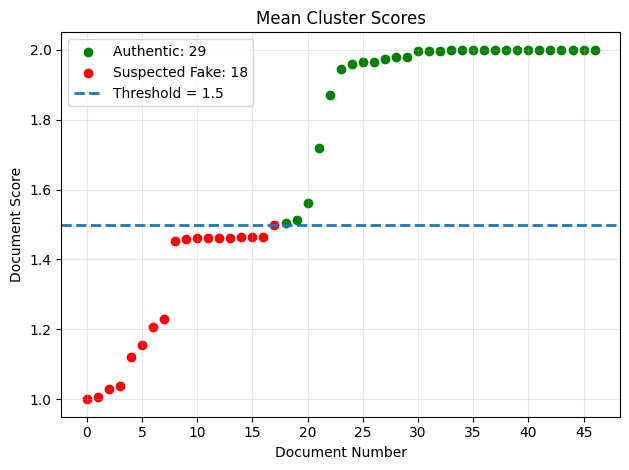

In [ ]:
path = os.path.join(OUTPUT_DIR, "final_cluster_scores_sorted.csv")
df = pd.read_csv(path)

scores = df["score"].to_numpy()

# load data into 2 arrays
authentic_cluster_scores = scores[scores >= 1.5]
fake_cluster_scores = scores[scores < 1.5]

def plot_1d_scatter_plot(scores, threshold):
  authentic_scores = scores[scores >= 1.5]
  fake_scores = scores[scores < 1.5]
  x = np.arange(len(scores))

  plt.scatter(
      np.where(scores>=threshold),
      authentic_scores,
      label=f"Authentic: {len(authentic_scores)}",
      color="green"
  )
  plt.scatter(
      np.where(scores<threshold),
      fake_scores,
      label=f"Suspected Fake: {len(fake_scores)}",
      color="red"
  )
  plt.axhline(
      threshold,
      linestyle="--",
      linewidth=2,
      label=f"Threshold = {threshold}"
  )

  plt.xticks(np.arange(0, len(scores), 5))
  plt.yticks(np.arange(1.0, 2.1, 0.2))
  plt.xlabel("Document Number")
  plt.ylabel("Document Score")
  plt.title("Mean Cluster Scores")
  plt.legend()
  plt.grid(alpha=0.3)

  plt.tight_layout()
  plt.show()

plot_1d_scatter_plot(scores, 1.5)

### Cluster Assignments Matrix

(47, 500)
int64


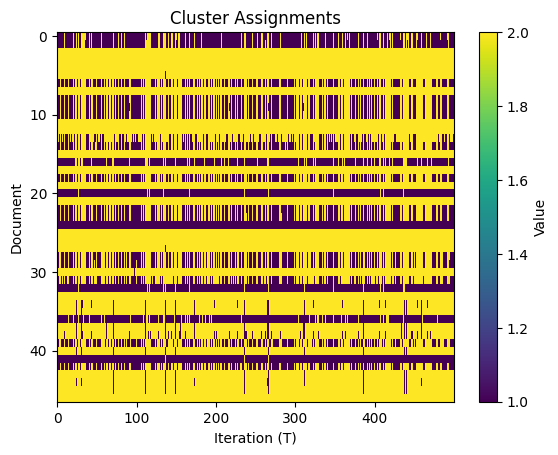

In [ ]:
path = os.path.join(OUTPUT_DIR, "prediction_label_matrix.npy")
anomaly_matrix = np.load(path)
print(anomaly_matrix.shape)
print(anomaly_matrix.dtype)
plt.figure()
plt.imshow(anomaly_matrix, aspect="auto", interpolation="nearest")
plt.colorbar(label="Value")
plt.xlabel("Iteration (T)")
plt.ylabel("Document")
plt.title("Cluster Assignments")
plt.show()

### Anomaly Matrix

(47, 98)
float64


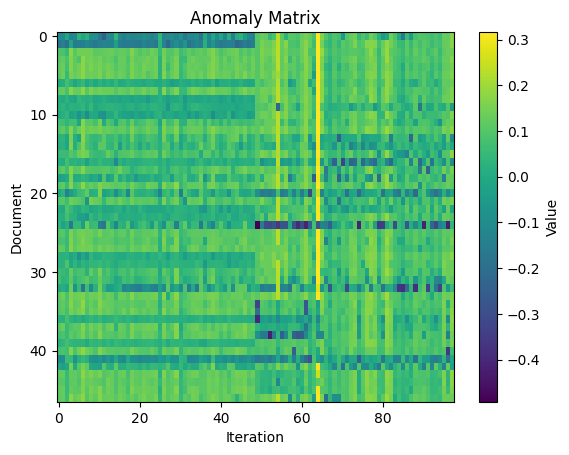

In [ ]:
path = os.path.join(OUTPUT_DIR, "anomaly_matrix.npy")
anomaly_matrix = np.load(path)
print(anomaly_matrix.shape)
print(anomaly_matrix.dtype)
plt.figure()
plt.imshow(anomaly_matrix, aspect="auto", interpolation="nearest")
plt.colorbar(label="Value")
plt.xlabel("Iteration")
plt.ylabel("Document")
plt.title("Anomaly Matrix")
plt.show()


### DTW Matrix

In [ ]:
path = os.path.join(OUTPUT_DIR, "Distance Matrices/distance_matrix_1.npy")
anomaly_matrix = np.load(path)
print(anomaly_matrix.shape)
print(anomaly_matrix.dtype)
plt.figure()
plt.imshow(anomaly_matrix, aspect="auto", interpolation="nearest")
plt.colorbar(label="Value")
plt.title("Distance Matrix")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Studies/Semester 8/Capstone Project - Phase 2/Data/Signals/3 Conv Layer - Impostor Hashing/Distance Matrices/distance_matrix_1.npy'

### Signal


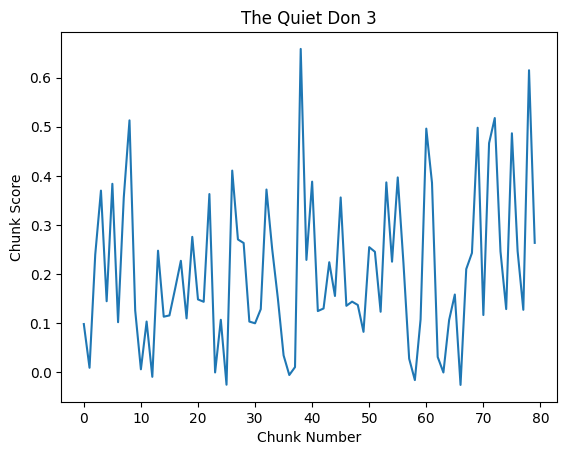

In [ ]:
# load a signal.
# Sholohov_Sobranie_sochineniy_v_vosmi_tomah_3_Tom_3._Tihiy_Don._Kniga_vtoraya.144026.txt
data = {
    "book": "Sholohov_Sobranie_sochineniy_v_vosmi_tomah_3_Tom_3._Tihiy_Don._Kniga_vtoraya.144026.txt",
    "signal": [
      0.125,
      0.0,
      0.25,
      0.375,
      0.125,
      0.375,
      0.125,
      0.375,
      0.5,
      0.125,
      0.0,
      0.125,
      0.0,
      0.25,
      0.125,
      0.125,
      0.125,
      0.25,
      0.125,
      0.25,
      0.125,
      0.125,
      0.375,
      0.0,
      0.125,
      0.0,
      0.375,
      0.25,
      0.25,
      0.125,
      0.125,
      0.125,
      0.375,
      0.25,
      0.125,
      0.0,
      0.0,
      0.0,
      0.625,
      0.25,
      0.375,
      0.125,
      0.125,
      0.25,
      0.125,
      0.375,
      0.125,
      0.125,
      0.125,
      0.125,
      0.25,
      0.25,
      0.125,
      0.375,
      0.25,
      0.375,
      0.25,
      0.0,
      0.0,
      0.125,
      0.5,
      0.375,
      0.0,
      0.0,
      0.125,
      0.125,
      0.0,
      0.25,
      0.25,
      0.5,
      0.125,
      0.5,
      0.5,
      0.25,
      0.125,
      0.5,
      0.25,
      0.125,
      0.625,
      0.25,
      0.0,
      0.25,
      0.25,
      0.0,
      0.125,
      0.0,
      0.25,
      0.25,
      0.0,
      0.0,
      0.375,
      0.125,
      0.0,
      0.0,
      0.375,
      0.25,
      0.125,
      0.25,
      0.125,
      0.0,
      0.375,
      0.25,
      0.0,
      0.375,
      0.25,
      0.125,
      0.125,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.125,
      0.0,
      0.125,
      0.0,
      0.0,
      0.5,
      0.0,
      0.0,
      0.0,
      0.375,
      0.0,
      0.375,
      0.0,
      0.125,
      0.0,
      0.25,
      0.0,
      0.0,
      0.0,
      0.125,
      0.125,
      0.125,
      0.0,
      0.125,
      0.0,
      0.125,
      0.25,
      0.125,
      0.25,
      0.375,
      0.0,
      0.125,
      0.125,
      0.25,
      0.125,
      0.375,
      0.0,
      0.125,
      0.0,
      0.25,
      0.25,
      0.375,
      0.0,
      0.25,
      0.0,
      0.0,
      0.0,
      0.25,
      0.375,
      0.25,
      0.25,
      0.0,
      0.125,
      0.25,
      0.25,
      0.25,
      0.125,
      0.0,
      0.375,
      0.625,
      0.25,
      0.125,
      0.125,
      0.125,
      0.25,
      0.375,
      0.25,
      0.0,
      0.375,
      0.625,
      0.125,
      0.375,
      0.125,
      0.0,
      0.125,
      0.0,
      0.125,
      0.125,
      0.125,
      0.0,
      0.375,
      0.0,
      0.125,
      0.25,
      0.25,
      0.0,
      0.0,
      0.0,
      0.0,
      0.375,
      0.375,
      0.125,
      0.25,
      0.375,
      0.0,
      0.0,
      0.125,
      0.0,
      0.0,
      0.25,
      0.25,
      0.25,
      0.125,
      0.375,
      0.25,
      0.125,
      0.25,
      0.125,
      0.125,
      0.125,
      0.25,
      0.25,
      0.25,
      0.0,
      0.25,
      0.125,
      0.25,
      0.0,
      0.375,
      0.25,
      0.375,
      0.0,
      0.375,
      0.625,
      0.25,
      0.375,
      0.0,
      0.125,
      0.125,
      0.375,
      0.375,
      0.0,
      0.125,
      0.25,
      0.0,
      0.125,
      0.125,
      0.0,
      0.125,
      0.0,
      0.125,
      0.125,
      0.125,
      0.0,
      0.125,
      0.0,
      0.25,
      0.125,
      0.125,
      0.125,
      0.125,
      0.25,
      0.125,
      0.25,
      0.375,
      0.25,
      0.25,
      0.0,
      0.125,
      0.125,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.125,
      0.375,
      0.25,
      0.0,
      0.0,
      0.25,
      0.25,
      0.25,
      0.125,
      0.5,
      0.25,
      0.0,
      0.0,
      0.125,
      0.125,
      0.0,
      0.25,
      0.25,
      0.0,
      0.0,
      0.125,
      0.125,
      0.125,
      0.375,
      0.0,
      0.125,
      0.375,
      0.125,
      0.125,
      0.0,
      0.375,
      0.125,
      0.25,
      0.375,
      0.125,
      0.25,
      0.25,
      0.125,
      0.375,
      0.0,
      0.125,
      0.125,
      0.125,
      0.0,
      0.25,
      0.25,
      0.5,
      0.25,
      0.25,
      0.125,
      0.0,
      0.5,
      0.125,
      0.0,
      0.125,
      0.375,
      0.5,
      0.125,
      0.0,
      0.125,
      0.375,
      0.0,
      0.375,
      0.125,
      0.25,
      0.125,
      0.25,
      0.125,
      0.5,
      0.125,
      0.0,
      0.125,
      0.0,
      0.0,
      0.5,
      0.0,
      0.125,
      0.125,
      0.0,
      0.0,
      0.125,
      0.125,
      0.0,
      0.125,
      0.0,
      0.0,
      0.25,
      0.125,
      0.0,
      0.25,
      0.25,
      0.125,
      0.0,
      0.25,
      0.25,
      0.125,
      0.25,
      0.375,
      0.25,
      0.375,
      0.25,
      0.5,
      0.375,
      0.0,
      0.25,
      0.125,
      0.125,
      0.125,
      0.25,
      0.125,
      0.25,
      0.125,
      0.0,
      0.375,
      0.0,
      0.0,
      0.5,
      0.25,
      0.0,
      0.125,
      0.5,
      0.25,
      0.0,
      0.25,
      0.375,
      0.0,
      0.5,
      0.5,
      0.125,
      0.375,
      0.5,
      0.125,
      0.0,
      0.125,
      0.0,
      0.125,
      0.0,
      0.125,
      0.375,
      0.0,
      0.25,
      0.125,
      0.375,
      0.5,
      0.0,
      0.25,
      0.0,
      0.25,
      0.25,
      0.25,
      0.375,
      0.25,
      0.0,
      0.25,
      0.25,
      0.0,
      0.125,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.25,
      0.25,
      0.0,
      0.0,
      0.0,
      0.5,
      0.125,
      0.375,
      0.375,
      0.125,
      0.0,
      0.125,
      0.0,
      0.125,
      0.0,
      0.125,
      0.125,
      0.125,
      0.0,
      0.0,
      0.25,
      0.25,
      0.5,
      0.25,
      0.125,
      0.75,
      0.5,
      0.0,
      0.125,
      0.25,
      0.125,
      0.125,
      0.125,
      0.25,
      0.0,
      0.25,
      0.25,
      0.25,
      0.125,
      0.125,
      0.0,
      0.0,
      0.125,
      0.375,
      0.25,
      0.5,
      0.375,
      0.0,
      0.125,
      0.25,
      0.25,
      0.25,
      0.25,
      0.0,
      0.625,
      0.375,
      0.375,
      0.0,
      0.125,
      0.25,
      0.125,
      0.25,
      0.0,
      0.375,
      0.0,
      0.25,
      0.125,
      0.5,
      0.125,
      0.125,
      0.0,
      0.0,
      0.0,
      0.25,
      0.125,
      0.125,
      0.125,
      0.0,
      0.125,
      0.0,
      0.25,
      0.125,
      0.0,
      0.0,
      0.0,
      0.375,
      0.125,
      0.375,
      0.125,
      0.125,
      0.125,
      0.0,
      0.25,
      0.0,
      0.0,
      0.25,
      0.25,
      0.375,
      0.0,
      0.25,
      0.375,
      0.25,
      0.0,
      0.25,
      0.0,
      0.125,
      0.375,
      0.625,
      0.25,
      0.0,
      0.125,
      0.0,
      0.375,
      0.0,
      0.375,
      0.375,
      0.25,
      0.125,
      0.125,
      0.75,
      0.125,
      0.0,
      0.375,
      0.375,
      0.25,
      0.25,
      0.125,
      0.0,
      0.25,
      0.125,
      0.125,
      0.125,
      0.0,
      0.125,
      0.125,
      0.125,
      0.25,
      0.25,
      0.0,
      0.0,
      0.125,
      0.0,
      0.125,
      0.0,
      0.25,
      0.0,
      0.125,
      0.0,
      0.25,
      0.125,
      0.25,
      0.25,
      0.0,
      0.125,
      0.0,
      0.125,
      0.0,
      0.0,
      0.0,
      0.125,
      0.125,
      0.0,
      0.0,
      0.375,
      0.375,
      0.125,
      0.0,
      0.125,
      0.25,
      0.0,
      0.375,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.25,
      0.125,
      0.0,
      0.125,
      0.0,
      0.125,
      0.0,
      0.25,
      0.0,
      0.0,
      0.375,
      0.375,
      0.0,
      0.0,
      0.375,
      0.125,
      0.25,
      0.125,
      0.125,
      0.125,
      0.125,
      0.125,
      0.125,
      0.0,
      0.0,
      0.0,
      0.0,
      0.375,
      0.125,
      0.5,
      0.5,
      0.25,
      0.125,
      0.125,
      0.125,
      0.25,
      0.125,
      0.125,
      0.125,
      0.5,
      0.5,
      0.125,
      0.125,
      0.25,
      0.0,
      0.25,
      0.125,
      0.25,
      0.0,
      0.25,
      0.25,
      0.125,
      0.25,
      0.0,
      0.0,
      0.25,
      0.125,
      0.125,
      0.125,
      0.0,
      0.25,
      0.0,
      0.0,
      0.3333333333333333
    ]
  }
signal = np.array(data["signal"])
# plot the signal.
plt.plot(signal[:80])
plt.xlabel("Chunk Number")
plt.ylabel("Chunk Score")
plt.title("The Quiet Don 3")
plt.show()

# **Scraper**

## Code

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
from google.colab import drive
from urllib.parse import urljoin, urlparse
import re
import time
from abc import ABC, abstractmethod

# CONSTANTS
DEFAULT_ROOT_URL = "https://lib.ru/PROZA/"
DEFAULT_SAVE_DIRECTORY = "/content/drive/MyDrive/Studies/Semester 8/Capstone Project - Phase 2/Data/Books"
DEFAULT_MAX_BOOKS_PER_AUTHOR = 10
DEFAULT_MAX_AUTHORS_TO_PROCESS = 50

# ABSTRACT BASE CLASS
class SiteScraperService(ABC):
    @abstractmethod
    def scrape_site(self):
        """Abstract method to start the scraping process."""
        pass

# LIB.RU SCRAPER CLASS
class LibruScraper(SiteScraperService):
    def __init__(self,
                 root_url=DEFAULT_ROOT_URL,
                 save_directory=DEFAULT_SAVE_DIRECTORY,
                 max_books_per_author=DEFAULT_MAX_BOOKS_PER_AUTHOR,
                 max_authors_to_process=DEFAULT_MAX_AUTHORS_TO_PROCESS):
        self.root_url = root_url
        self.save_directory = save_directory
        self.max_books_per_author = max_books_per_author
        self.max_authors_to_process = max_authors_to_process

        os.makedirs(self.save_directory, exist_ok=True)
        print(f"Save directory verified: {self.save_directory}")
        print(f"Directory exists: {os.path.exists(self.save_directory)}")
        print(f"Can write: {os.access(self.save_directory, os.W_OK)}")

    @staticmethod
    def _sanitize_path_component(name):
        cleaned_name = re.sub(r'[^а-яА-ЯёЁ -\.0-9A-Z_a-z]', '', name)
        cleaned_name = re.sub(r'\s+', '_', cleaned_name)
        cleaned_name = cleaned_name.strip('._')
        cleaned_name = cleaned_name[:200]
        return cleaned_name or "unnamed_file"

    def _get_soup(self, url, encoding='windows-1251'):
        try:
            r = requests.get(url, timeout=10)
            r.encoding = encoding
            r.raise_for_status()
            return BeautifulSoup(r.text, "html.parser")
        except requests.exceptions.RequestException as e:
            print(f"Failed to fetch {url} | Reason: {e}")
            return None

    @staticmethod
    def _extract_text_content(soup):
        if not soup:
            print("DEBUG: soup is None")
            return None

        main_content = soup.find('pre') or soup.find('body')
        if not main_content:
            print("DEBUG: No <pre> or <body> found")
            return None

        for element in main_content.find_all(['form', 'select', 'input', 'script', 'style']):
            element.decompose()

        text = main_content.get_text()
        text = re.sub(r'\n{3,}', '\n\n', text)
        text = re.sub(r' +', ' ', text)
        text = re.sub(r'\t+', ' ', text)
        text = text.strip()

        lines = text.split('\n')
        cleaned_lines = []
        skip_patterns = [
            r'^\s*OCR\s+',
            r'^\s*-{10,}',
            r'^\s*Fb2\.zip',
            r'^\s*Fine HTML',
            r'^\s*Printed version',
        ]

        for line in lines:
            if any(re.match(pattern, line, re.IGNORECASE) for pattern in skip_patterns):
                continue
            cleaned_lines.append(line)

        final_text = '\n'.join(cleaned_lines).strip()
        print(f"DEBUG: Extracted {len(final_text)} characters")
        return final_text

    def scrape_site(self):
        print(f"Starting scrape from: {self.root_url}")
        print(f"Saving to: {self.save_directory}")
        print(f"Max books per author: {self.max_books_per_author}")
        print(f"Max authors to process: {self.max_authors_to_process}\n")

        root_soup = self._get_soup(self.root_url, encoding='utf-8')
        if not root_soup:
            print("Retrying with windows-1251 encoding...")
            root_soup = self._get_soup(self.root_url, encoding='windows-1251')
            if not root_soup:
                print("Failed to get soup from root URL. Exiting.")
                return

        authors = []
        print("Extracting Author Directories")

        for link in root_soup.find_all("a"):
            href = link.get("href", "").strip()
            if not href.endswith("/"):
                continue

            is_relative_path = not urlparse(href).scheme and not urlparse(href).netloc
            is_not_parent_dir = not href.startswith('../')
            is_absolute_under_root = href.startswith(self.root_url)

            if is_relative_path and is_not_parent_dir:
                full_resolved_url = urljoin(self.root_url, href)
                if full_resolved_url.startswith(self.root_url):
                    authors.append(href)
            elif is_absolute_under_root:
                authors.append(href)

        authors_to_process = authors[:self.max_authors_to_process]
        print(f"Processing {len(authors_to_process)} authors.\n")

        total_books = 0

        for idx, author_link in enumerate(authors_to_process, 1):
            author_url = author_link if urlparse(author_link).scheme else urljoin(self.root_url, author_link)

            parsed = urlparse(author_url)
            author_base_name = parsed.path.strip('/').split('/')[-1] if parsed.path.strip('/') else parsed.netloc
            author_folder_name = self._sanitize_path_component(author_base_name)

            print(f"[{idx}/{len(authors_to_process)}] Checking: {author_folder_name}")

            # Check if folder exists BEFORE fetching author page
            author_folder = os.path.join(self.save_directory, author_folder_name)
            if os.path.exists(author_folder):
                print(f"Skipping {author_folder_name} (folder already exists)")
                continue

            author_soup = self._get_soup(author_url, encoding='windows-1251')
            if not author_soup:
                print("Failed to fetch author page")
                continue

            # Count eligible books
            book_links = []
            for link in author_soup.find_all("a"):
                href = link.get("href", "").strip()
                if (
                    href.endswith(".txt")
                    and href[0].isalnum()
                    and "?" not in href
                    and "#" not in href
                    and "=" not in href
                ):
                    book_links.append(href)

            if len(book_links) < 5:
                print(f"   Skipping {author_base_name} - only {len(book_links)} books (<5)")
                continue

            # Create folder
            os.makedirs(author_folder, exist_ok=True)
            print(f"Created folder: {author_folder}")
            print(f"Author accepted ({len(book_links)} books)\n")

            books_downloaded_count = 0

            for href in book_links:
                if books_downloaded_count >= self.max_books_per_author:
                    print(f"Max {self.max_books_per_author} books reached for {author_folder_name}")
                    break

                file_url = href if urlparse(href).scheme else urljoin(author_url, href)
                raw_filename = os.path.basename(urlparse(file_url).path)
                sanitized_filename = self._sanitize_path_component(raw_filename)

                file_save_path = os.path.join(author_folder, sanitized_filename)

                if os.path.exists(file_save_path):
                    print(f"Skipping {sanitized_filename} (already exists)")
                    books_downloaded_count += 1
                    continue

                print(f"Downloading: {sanitized_filename}")
                print(f"    URL: {file_url}")
                print(f"    Save path: {file_save_path}")

                try:
                    file_soup = self._get_soup(file_url, encoding='windows-1251')
                    text = self._extract_text_content(file_soup)

                    if text and len(text) > 100:
                        with open(file_save_path, "w", encoding="utf-8") as f:
                            f.write(text)

                        # VERIFY THE FILE WAS WRITTEN
                        if os.path.exists(file_save_path):
                            file_size = os.path.getsize(file_save_path)
                            print(f"VERIFIED: {sanitized_filename} saved ({file_size} bytes, {len(text)} chars)")
                            books_downloaded_count += 1
                            total_books += 1
                        else:
                            print(f"FILE NOT FOUND AFTER WRITE: {file_save_path}")
                    else:
                        print(f"Skipping {sanitized_filename} (no content or too short: {len(text) if text else 0} chars)")

                except Exception as e:
                    print(f"Failed {file_url} | Reason: {e}")
                    import traceback
                    traceback.print_exc()
                    continue

                time.sleep(0.5)

        print("\n============================================================")
        print("Scraping complete!")
        print(f"   Total books downloaded: {total_books}")
        print(f"   Authors processed: {len(authors_to_process)}")
        print(f"   Save directory: {self.save_directory}")

        # FINAL VERIFICATION
        print("\nFINAL VERIFICATION:")
        if os.path.exists(self.save_directory):
            subdirs = [d for d in os.listdir(self.save_directory) if os.path.isdir(os.path.join(self.save_directory, d))]
            print(f"   Folders in directory: {len(subdirs)}")
            for subdir in subdirs[:5]:  # Show first 5
                subdir_path = os.path.join(self.save_directory, subdir)
                files = os.listdir(subdir_path)
                print(f"   - {subdir}: {len(files)} files")
        else:
            print(f"DIRECTORY DOES NOT EXIST: {self.save_directory}")
        print("============================================================")


In [ ]:
def main():
    try:
        drive.mount('/content/drive', force_remount=True)
        print("Drive mounted successfully")
    except Exception as e:
        print(f"Drive mount issue: {e}")

    scraper = LibruScraper()
    scraper.scrape_site()
main()

## Test

In [ ]:
import os
import shutil
import tempfile
from bs4 import BeautifulSoup

def run_test(name, test_func):
    print(f"\n==== {name} ====")
    test_func()
    print(f"{name} passed!")

def test_sanitize_valid():
    output = LibruScraper._sanitize_path_component("Hello world 2026")
    assert output == "Hello_world_2026", f"Unexpected sanitize result: {output}"

def test_sanitize_all_invalid_becomes_unnamed():
    output = LibruScraper._sanitize_path_component("@@@")
    assert output == "unnamed_file", f"Expected unnamed_file, got: {output}"

def test_get_soup_valid_url_returns_soup():
    with tempfile.TemporaryDirectory() as tmpdir:
        scraper = LibruScraper(save_directory=tmpdir)

        soup = scraper._get_soup("https://lib.ru/PROZA/", encoding="utf-8")
        assert soup is not None, "Expected soup, got None"
        assert soup.find("a") is not None, "Expected at least one <a> on the page"

def test_get_soup_invalid_url_returns_none():
    with tempfile.TemporaryDirectory() as tmpdir:
        s = LibruScraper(save_directory=tmpdir)

        # .invalid is reserved; should fail quickly
        soup = s._get_soup("https://example.invalid/", encoding="utf-8")
        assert soup is None, f"Expected None for invalid URL, got {type(soup)}"

def test_extract_text_valid_pre():
    html = """
    <html><body>
      <pre>
        OCR junk should be removed
        -----------
        Real line 1

        Real    line    2
        <script>script</script>
        <style>style</style>
      </pre>
    </body></html>
    """
    soup = BeautifulSoup(html, "html.parser")
    text = LibruScraper._extract_text_content(soup)

    assert isinstance(text, str), f"Expected str, got {type(text)}"
    assert "Real line 1" in text, "Missing Real line 1"
    assert "Real line 2" in text, "Missing Real line 2"
    assert "OCR junk" not in text, "OCR line should be removed"
    assert "script" not in text, "Script content should be removed"
    assert "style" not in text, "Style content should be removed"

def test_extract_text_missing_body_and_pre_returns_none():
    soup = BeautifulSoup("<html><head></head></html>", "html.parser")
    text = LibruScraper._extract_text_content(soup)
    assert text is None, f"Expected None, got {text}"

def test_scrape_site_invalid_root_url_creates_nothing_and_no_crash():
    with tempfile.TemporaryDirectory() as tmpdir:
        scraper = LibruScraper(
            root_url="https://example.invalid/",
            save_directory=tmpdir,
            max_books_per_author=1,
            max_authors_to_process=1
        )
        scraper.scrape_site()  # should exit gracefully

        subdirs = [d for d in os.listdir(tmpdir) if os.path.isdir(os.path.join(tmpdir, d))]
        assert len(subdirs) == 0, f"Expected 0 subdirs, found {len(subdirs)}"

def test_scrape_site_zero_authors_downloads_nothing():
    with tempfile.TemporaryDirectory() as tmpdir:
        s = LibruScraper(
            root_url="https://lib.ru/PROZA/",
            save_directory=tmpdir,
            max_books_per_author=1,
            max_authors_to_process=0
        )
        s.scrape_site()

        subdirs = [d for d in os.listdir(tmpdir) if os.path.isdir(os.path.join(tmpdir, d))]
        assert len(subdirs) == 0, f"Expected 0 subdirs with max_authors_to_process=0, found {len(subdirs)}"

run_test("test_sanitize_valid", test_sanitize_valid)
run_test("test_sanitize_all_invalid_becomes_unnamed",
         test_sanitize_all_invalid_becomes_unnamed)

run_test("test_get_soup_valid_url_returns_soup",
         test_get_soup_valid_url_returns_soup)
run_test("test_get_soup_invalid_url_returns_none",
         test_get_soup_invalid_url_returns_none)

run_test("test_extract_text_valid_pre", test_extract_text_valid_pre)
run_test("test_extract_text_missing_body_and_pre_returns_none",
         test_extract_text_missing_body_and_pre_returns_none)

run_test("test_scrape_site_invalid_root_url_creates_nothing_and_no_crash",
         test_scrape_site_invalid_root_url_creates_nothing_and_no_crash)
run_test("test_scrape_site_zero_authors_downloads_nothing",
         test_scrape_site_zero_authors_downloads_nothing)
print("All tests passed!")



==== test_sanitize_valid ====
test_sanitize_valid passed!

==== test_sanitize_all_invalid_becomes_unnamed ====
test_sanitize_all_invalid_becomes_unnamed passed!

==== test_get_soup_valid_url_returns_soup ====
Save directory verified: /tmp/tmpf22ukotz
Directory exists: True
Can write: True
test_get_soup_valid_url_returns_soup passed!

==== test_get_soup_invalid_url_returns_none ====
Save directory verified: /tmp/tmp1mkfl0ck
Directory exists: True
Can write: True
Failed to fetch https://example.invalid/ | Reason: HTTPSConnectionPool(host='example.invalid', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7d3c52de55e0>: Failed to resolve 'example.invalid' ([Errno -2] Name or service not known)"))
test_get_soup_invalid_url_returns_none passed!

==== test_extract_text_valid_pre ====
DEBUG: Extracted 25 characters
test_extract_text_valid_pre passed!

==== test_extract_text_missing_body_and_pre_returns_none ====
DEBUG